[*********************100%***********************]  1 of 1 completed


Downloaded 1257 days of data for AAPL
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-05-04  71.143799  71.272418  69.483875  70.175512  133568000
2020-05-05  72.211571  73.046387  71.459264  71.604873  147751200
2020-05-06  72.956589  73.589977  72.529471  72.915330  142333600
2020-05-07  73.711334  74.058371  73.281795  73.585144  115215200
2020-05-08  75.465782  75.519316  74.044701  74.373206  133838400

Descriptive Statistics of Daily Returns:
count    1256.000000
mean        0.001021
std         0.018828
min        -0.092456
25%        -0.008226
50%         0.001276
75%         0.011813
max         0.153289
Name: Daily_Return, dtype: float64
Data exported to AAPL_data.csv


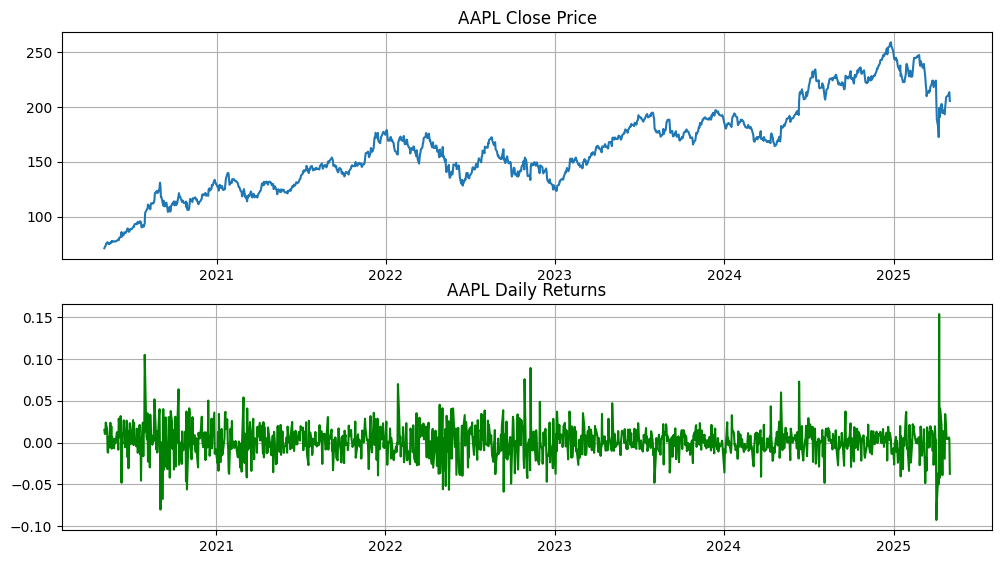

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# Define the stock ticker symbol and date range
ticker_symbol = "AAPL"  # Apple Inc. as an example
end_date = datetime.now()
start_date = end_date - timedelta(days=365*5)  # 5 years of data

# Download the data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the data
print(f"Downloaded {len(stock_data)} days of data for {ticker_symbol}")
print(stock_data.head())

# Calculate daily returns using the Close price
stock_data['Daily_Return'] = stock_data[('Close', 'AAPL')].pct_change()

# Basic statistics of returns
print("\nDescriptive Statistics of Daily Returns:")
print(stock_data['Daily_Return'].describe())

# Calculate other useful metrics
stock_data['Log_Return'] = np.log(stock_data[('Close', 'AAPL')] / stock_data[('Close', 'AAPL')].shift(1))
stock_data['Volatility'] = stock_data['Log_Return'].rolling(window=21).std() * np.sqrt(252)  # 21-day rolling volatility, annualized

# Plotting
plt.figure(figsize=(12, 10))

# Price chart
plt.subplot(3, 1, 1)
plt.plot(stock_data[('Close', 'AAPL')])
plt.title(f'{ticker_symbol} Close Price')
plt.grid(True)

# Daily returns
plt.subplot(3, 1, 2)
plt.plot(stock_data['Daily_Return'], color='green')
plt.title(f'{ticker_symbol} Daily Returns')
plt.grid(True)


# If you want to download data for multiple stocks
def download_multiple_stocks(tickers, start_date, end_date):
    """
    Download data for multiple stock tickers
    
    Parameters:
    tickers (list): List of ticker symbols
    start_date, end_date: Start and end dates for the data
    
    Returns:
    dict: Dictionary with ticker symbols as keys and DataFrames as values
    """
    data = {}
    for ticker in tickers:
        print(f"Downloading data for {ticker}...")
        data[ticker] = yf.download(ticker, start=start_date, end=end_date)
    return data

# Example usage for multiple stocks
# stock_tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "META"]
# multi_stock_data = download_multiple_stocks(stock_tickers, start_date, end_date)

# Export data to CSV if needed
stock_data.to_csv(f"{ticker_symbol}_data.csv")
print(f"Data exported to {ticker_symbol}_data.csv")

[*********************100%***********************]  1 of 1 completed
C:\Users\Admin\AppData\Local\Temp\ipykernel_17060\3620975973.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Close'].resample('M').last()


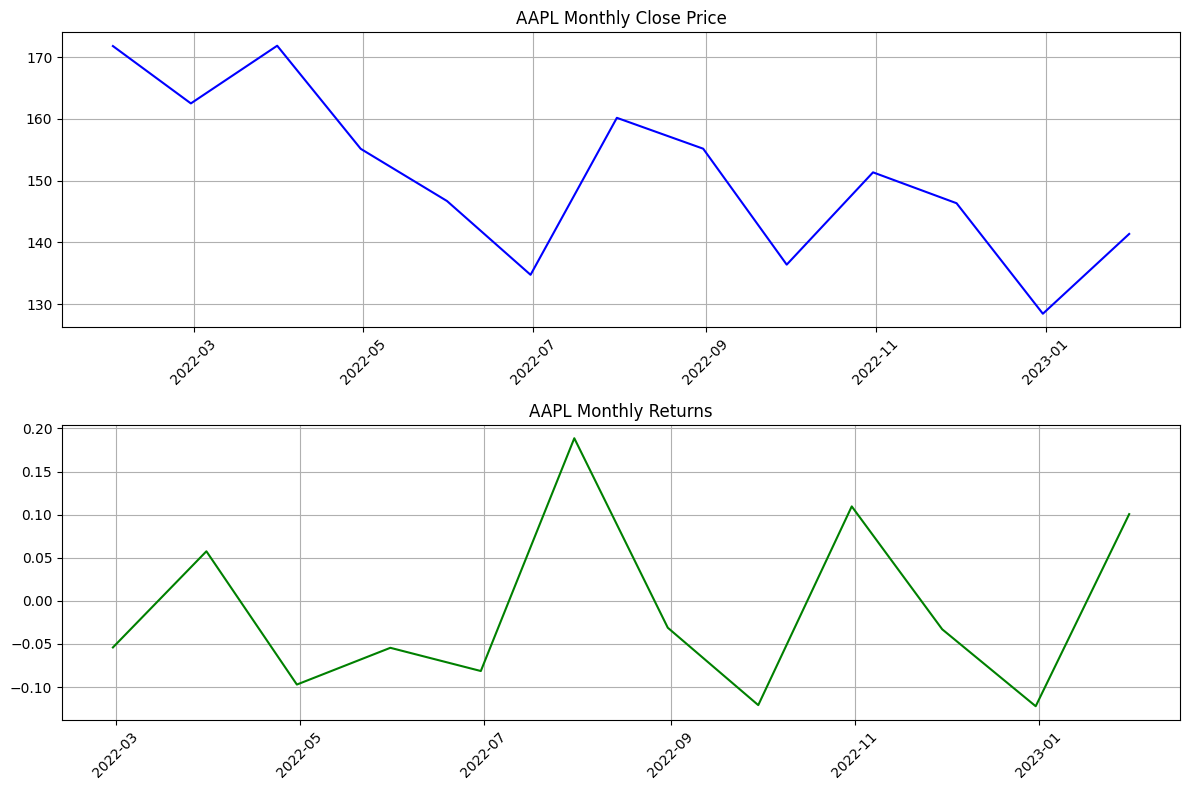


Summary Statistics for AAPL:

Monthly Close Prices:
Ticker        AAPL
count    13.000000
mean    150.906619
std      13.650463
min     128.436661
25%     141.356461
50%     151.326569
75%     160.153687
max     171.825821

Monthly Returns:
Ticker       AAPL
count   12.000000
mean    -0.011530
std      0.101363
min     -0.122273
25%     -0.085355
50%     -0.043547
75%      0.068253
max      0.188634


In [9]:
def get_monthly_data(ticker_symbol):
    """
    Get monthly data for a stock based on user input time period
    """
    try:
        # Get user input for time period
        start_year = int(input("Enter start year (YYYY): "))
        start_month = int(input("Enter start month (1-12): "))
        end_year = int(input("Enter end year (YYYY): "))
        end_month = int(input("Enter end month (1-12): "))
        
        # Validate input
        if not (1 <= start_month <= 12 and 1 <= end_month <= 12):
            print("Invalid month input. Month should be between 1 and 12.")
            return None
        
        # Create datetime objects
        start_date = datetime(start_year, start_month, 1)
        end_date = datetime(end_year, end_month + 1, 1) - timedelta(days=1)
        
        # Download data
        data = yf.download(ticker_symbol, start=start_date, end=end_date)
        
        # Check if data is empty
        if data.empty:
            print("No data available for the specified period.")
            return None
            
        # Resample to monthly data for Close price only
        monthly_data = data['Close'].resample('M').last()
        monthly_returns = monthly_data.pct_change()
        
        # Create figure with two subplots
        plt.figure(figsize=(12, 8))
        
        # Plot monthly closing prices
        plt.subplot(2, 1, 1)
        plt.plot(monthly_data.index, monthly_data, 'b-')
        plt.title(f'{ticker_symbol} Monthly Close Price')
        plt.grid(True)
        plt.xticks(rotation=45)
        
        # Plot monthly returns
        plt.subplot(2, 1, 2)
        plt.plot(monthly_returns.index, monthly_returns, 'g-')
        plt.title(f'{ticker_symbol} Monthly Returns')
        plt.grid(True)
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Print summary statistics
        print(f"\nSummary Statistics for {ticker_symbol}:")
        print("\nMonthly Close Prices:")
        print(monthly_data.describe())
        print("\nMonthly Returns:")
        print(monthly_returns.describe())
        
        return monthly_data, monthly_returns
        
    except ValueError as e:
        print(f"Error: {e}")
        print("Please enter valid numeric values for year and month.")
        return None

# Ask user if they want to see monthly data
user_input = input("Do you want to see month-wise data? (yes/no): ").lower()
if user_input == 'yes':
    result = get_monthly_data(ticker_symbol)
    if result is not None:
        monthly_data, monthly_returns = result
        # Ask if user wants to export monthly data to CSV
        export = input("Do you want to export monthly data to CSV? (yes/no): ").lower()
        if export == 'yes':
            pd.DataFrame({
                'Close': monthly_data,
                'Returns': monthly_returns
            }).to_csv(f"{ticker_symbol}_monthly_data.csv")
            print(f"Monthly data exported to {ticker_symbol}_monthly_data.csv")